# Regresja i klasyfikacja

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

In [2]:
data = np.loadtxt('SGD_data.txt', delimiter=',')
Y = data[:, 0]
X = np.array([(x-32)*5/9 for x in data[:, 1]])

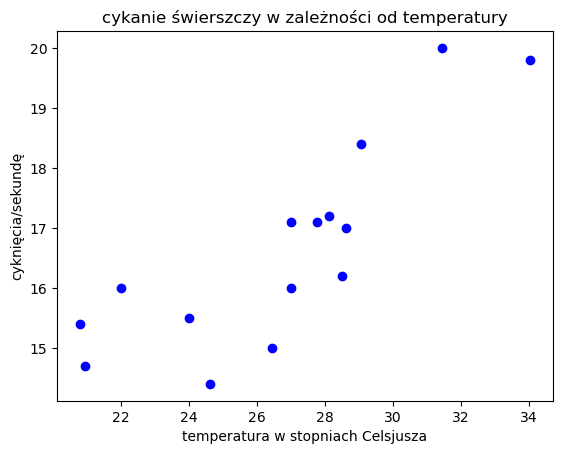

In [3]:
plt.scatter(X, Y, marker='o', c='b')
plt.title('cykanie świerszczy w zależności od temperatury')
plt.ylabel('cyknięcia/sekundę')
plt.xlabel('temperatura w stopniach Celsjusza')
plt.show()

In [4]:
samples_cnt = len(X)
weight0 = 10.0 # inicjalizacja wag
weight1 = 10.0 #
learning_rate = 0.001 #rozmiar stałej uczenia
maxIteration = 1000 #liczba iteracji

**Zadanie 1: uzupełnij listę wartości tak, aby dla każdej temperatury wyznaczyć liczbę cyknięć świerszczy przy użyciu aktualnych wag modelu liniowego**

**Zadanie 2: napisz kod, który iteracyjnie będzie poprawiać wagi, by wyznaczyły model najlepiej odwzorowujący zależność liczby cyknięć od temperatury**

In [5]:
a_list = []
b_list = []
y_list = []

for i in range(maxIteration):
    #Zadanie1: 
    predicted_values = weight0 + weight1 * X
    
    #Zadanie2:
    mse = mean_squared_error(Y, predicted_values)
    
    #aktualizacja wag
    weight0 = weight0 - learning_rate * (2 / samples_cnt) * np.sum(predicted_values - Y)
    weight1 = weight1 - learning_rate * (2 / samples_cnt) * np.sum((predicted_values - Y) * X)
    
    #dodanie wartości do list
    a_list.append(weight1)
    b_list.append(weight0)
    y_list.append(mse)


### Zobaczmy jak wygląda ostateczna prosta i jak wyglądała aktualizacja wag

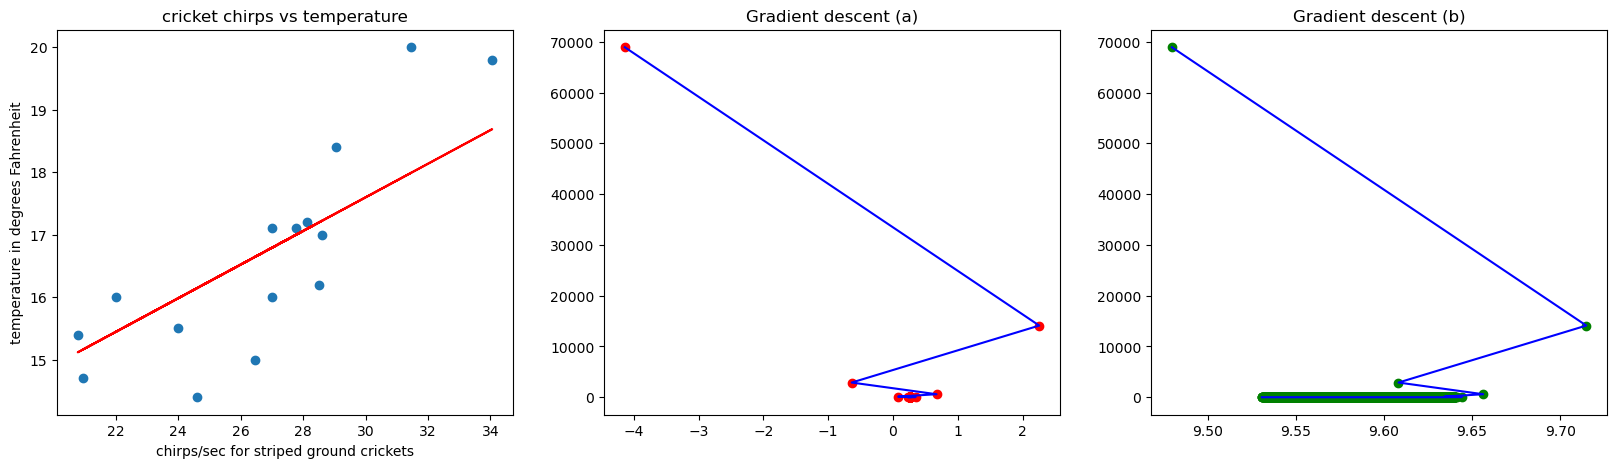

Computed weights values -> w0: 9.530626446374514 w1: 0.26892387326253875


In [6]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.plot(X, Y, "o")
if len(predicted_values) > 0:
    plt.plot(X, predicted_values, "r-")
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.subplot(1,3,2)
plt.scatter(a_list,y_list,c="r")
plt.plot(a_list,y_list,c="b")
plt.title("Gradient descent (a)")
plt.subplot(1,3,3)
plt.scatter(b_list,y_list,c="g")
plt.plot(b_list,y_list,c="b")
plt.title("Gradient descent (b)")
plt.show()
print("Computed weights values -> w0:", weight0, "w1:", weight1)

**Zadanie 3. Po przeczytaniu dokumentacji biblioteki scikit-learn stwórz klasyfikatory regresji logistycznej (Logistic Regression) oraz MLP (Multi-Layer Perceptron), naucz je na podstawie zbioru digits i użyj do rozpoznawania cyfr w zbiorze  testowym, etykiety umieść w zmiennych predicted_logreg i predicted_mlp. Spróbuj doprowadzić do momentu w którym regresja logistyczna osiągnie lepszy wynik niż MLP. Wyjaśnij dlaczego może być to trudne, nawiązując do metody działania tych algorytmów**

tu odpowiedź

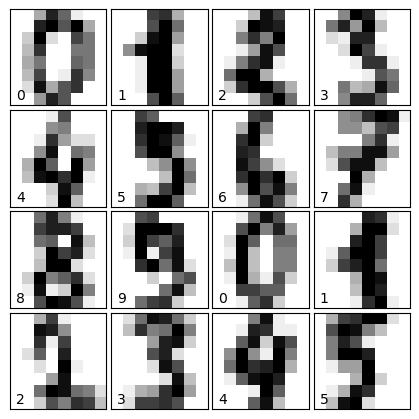

In [7]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

digits = load_digits()
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#deklaracja
mlp = MLPClassifier(random_state=16)
logreg = LogisticRegression(max_iter=1000, random_state=16)
#uczenie
mlp.fit(X_train_scaled, y_train)
logreg.fit(X_train_scaled, y_train)
#prognoza
predicted_logreg = logreg.predict(X_test_scaled)
predicted_mlp = mlp.predict(X_test_scaled)


[[35  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  1]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  1 29  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 42  0  1]
 [ 0  1  0  0  0  1  0  0 33  1]
 [ 0  0  0  0  0  0  0  0  1 34]]
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  0  1  1  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 34]]


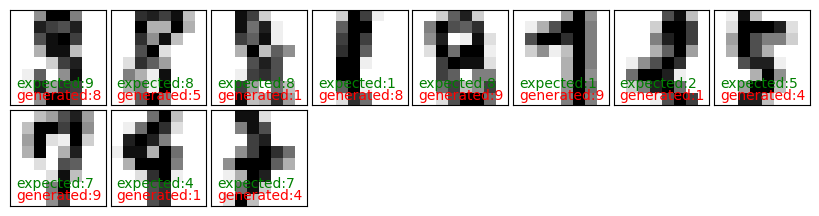

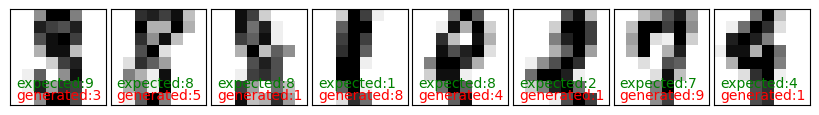

In [8]:
if predicted_logreg is not None:
    print(confusion_matrix(y_test,predicted_logreg))
    expected = y_test
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):
        if predicted_logreg[i] != expected[i]:
            ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            ax.text(0, 7, "generated:" + str(predicted_logreg[i]), color='red')
            ax.text(0, 6, "expected:" + str(expected[i]), color='green')
            
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):    
        if predicted_mlp[i] != expected[i]:
            bx = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            bx.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            bx.text(0, 7, "generated:" + str(predicted_mlp[i]), color='red')
            bx.text(0, 6, "expected:" + str(expected[i]), color='green')
    print(confusion_matrix(y_test,predicted_mlp))

### Zobacz na które fragmenty klasyfikator LogisticRegression zwraca uwagę

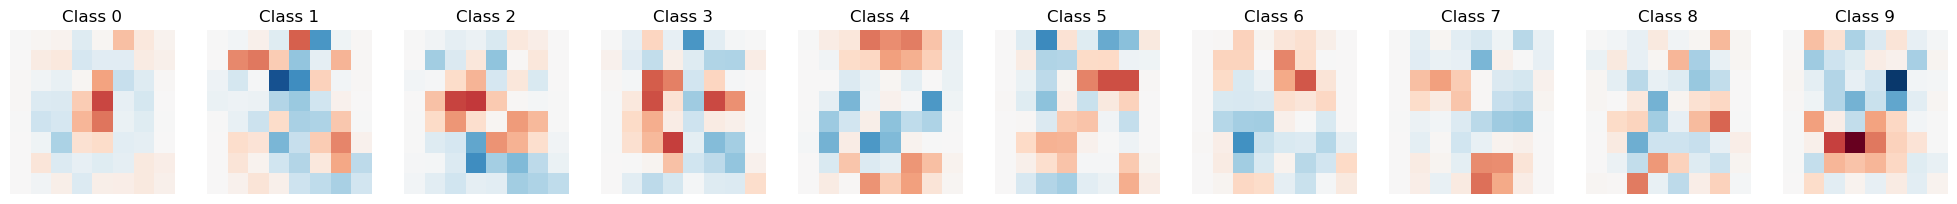

In [9]:
scale = np.max(np.abs(logreg.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(logreg.coef_[i].reshape(8, 8),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

**Zadanie 4. Tensorflow Playground**

**Zajrzyj na stronę [playground.tensorflow.org](http://playground.tensorflow.org).**

**Ustaw minimalną sieć o zerowej liczbie warstw ukrytych (0 hidden layers; nie zmieniaj kolumny features) i naucz ją na problemie nr 3 (dwie grupy) - spójrz na wizualizację i wykres błędu treningowego i testowego - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? Zmień problem na pierwszy i naucz sieć jeszcze raz - na czym polega różnica i dlaczego? Jak sprawić by efekt znów był zadowalający?**

tu odpowiedź

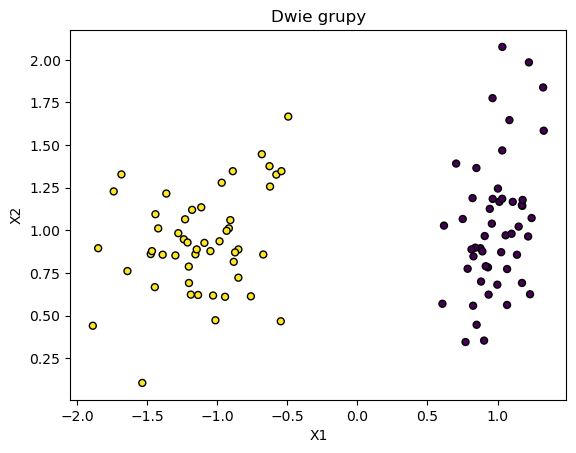

MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, random_state=1)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X1, y1 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='k')
plt.title('Dwie grupy')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

mlp = MLPClassifier(hidden_layer_sizes=(1,), random_state=1, max_iter=1000)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
mlp.fit(X1_train, y1_train)


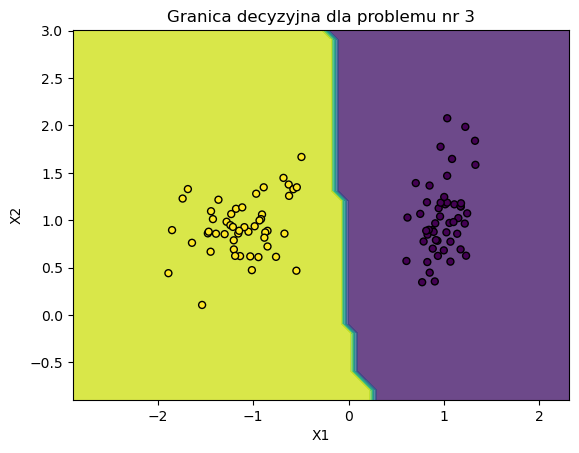

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), random_state=1, max_iter=1000)
mlp.fit(X1_train, y1_train)

x1_min, x1_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
x2_min, x2_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = mlp.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='k')
plt.title('Granica decyzyjna dla problemu nr 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

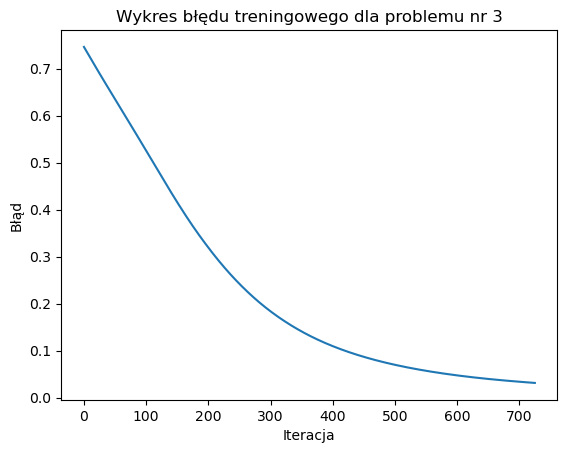

In [12]:
plt.plot(mlp.loss_curve_)
plt.title('Wykres błędu treningowego dla problemu nr 3')
plt.xlabel('Iteracja')
plt.ylabel('Błąd')
plt.show()

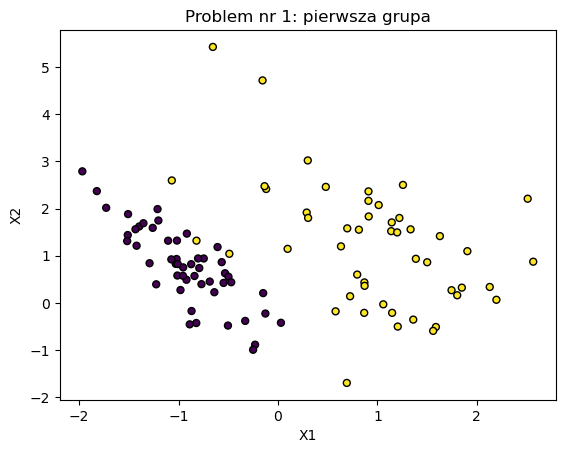

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)

In [13]:
X2, y2 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=25, edgecolor='k')
plt.title('Problem nr 1: pierwsza grupa')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

mlp = MLPClassifier(hidden_layer_sizes=(10,), random_state=1, max_iter=1000)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=2)
mlp.fit(X2_train, y2_train)

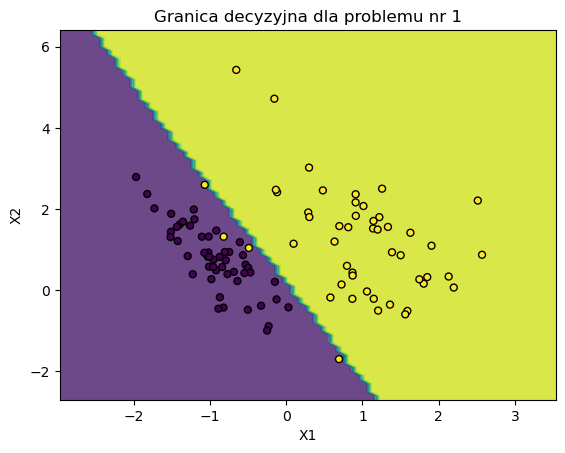

In [14]:
x1_min, x1_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
x2_min, x2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = mlp.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=25, edgecolor='k')
plt.title('Granica decyzyjna dla problemu nr 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

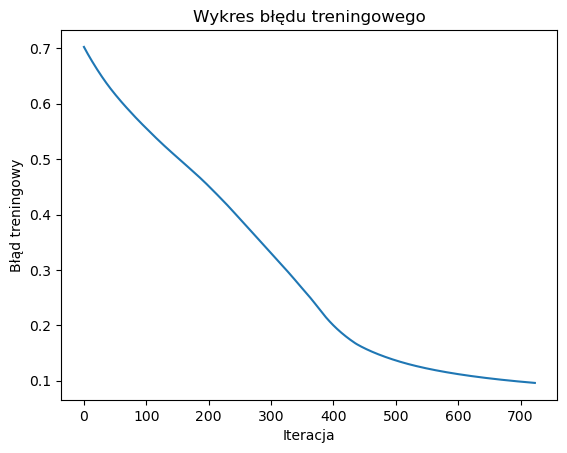

In [15]:
plt.plot(mlp.loss_curve_)
plt.title('Wykres błędu treningowego')
plt.xlabel('Iteracja')
plt.ylabel('Błąd treningowy')
plt.show()